In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
nt_gfdl = 6000
nt_newmann = 12054*9

df1 = pd.read_csv("benchmark.csv", parse_dates=['timestamp'])
df1['n_tds_pods'] = 1
df2 = pd.read_csv("benchmark_3pods.csv", parse_dates=['timestamp'])
df2['n_tds_pods'] = 3
df = pd.concat([df1, df2])
df = df.drop(df.columns[0], axis=1)
df['n_chunks'] = nt_gfdl
df

,timestamp,nworkers,chunksize,runtime,datasize,n_tds_pods,n_chunks
0,2018-12-04 11:14:47.842086,1,3,48.501455,1244.16,1,6000
1,2018-12-04 11:15:29.743114,1,6,41.544004,1244.16,1,6000
2,2018-12-04 11:16:07.901492,1,12,37.879397,1244.16,1,6000
3,2018-12-04 11:16:45.810500,1,24,37.710431,1244.16,1,6000
4,2018-12-04 11:17:22.719290,1,48,36.725775,1244.16,1,6000
5,2018-12-04 11:18:06.366406,2,3,38.422807,1244.16,1,6000
6,2018-12-04 11:18:40.473944,2,6,33.785652,1244.16,1,6000
7,2018-12-04 11:19:13.280861,2,12,32.554676,1244.16,1,6000
8,2018-12-04 11:19:45.588591,2,24,32.089000,1244.16,1,6000
9,2018-12-04 11:20:17.526235,2,48,31.755417,1244.16,1,6000


In [3]:
fnames_zarr = ['benchmark_zarr.csv', 'benchmark_zarr_newmann.csv']

df_zarr = pd.concat([pd.read_csv(fname, parse_dates=['timestamp']) for fname in fnames_zarr])
df_zarr = df_zarr.drop(df_zarr.columns[0], axis=1)
df_zarr['n_chunks'] = nt_gfdl
df_zarr.n_chunks[df_zarr.chunksize==287] = nt_newmann
df_zarr

/Users/rpa/miniconda3/envs/geo_scipy/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,timestamp,nworkers,chunksize,runtime,datasize,n_chunks
0,2018-12-04 11:50:37.082122,1,120,15.306760,1244.160000,6000
1,2018-12-04 11:50:50.071016,2,120,7.831624,1244.160000,6000
2,2018-12-04 11:51:00.658136,4,120,5.377662,1244.160000,6000
3,2018-12-04 11:51:10.196044,8,120,4.303904,1244.160000,6000
4,2018-12-04 11:51:20.036329,16,120,4.558090,1244.160000,6000
0,2018-12-04 13:03:34.979395,1,287,300.475300,90204.807168,108486
1,2018-12-04 13:06:02.882823,2,287,142.762077,90204.807168,108486
2,2018-12-04 13:07:21.522131,4,287,73.413886,90204.807168,108486
3,2018-12-04 13:08:05.603415,8,287,38.860548,90204.807168,108486
4,2018-12-04 13:08:34.859688,16,287,23.999979,90204.807168,108486


In [4]:
# add a few columns of derived data

df['throughput'] = df.datasize / df.runtime
df['chunksize_mb'] = df.datasize / df.n_chunks * df.chunksize
df_zarr['throughput'] = df_zarr.datasize / df_zarr.runtime
df_zarr['chunksize_mb'] = df_zarr.datasize / df_zarr.n_chunks * df_zarr.chunksize

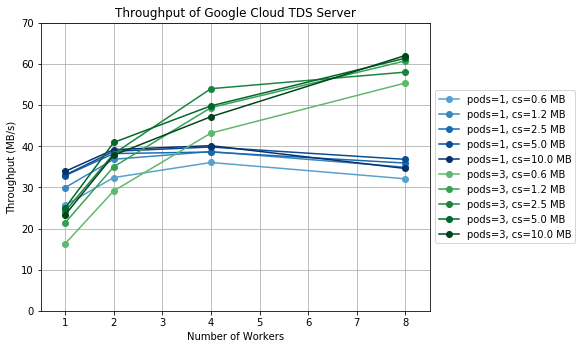

In [11]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.8])

import cycler
n = 10
blues = plt.cm.Blues(np.linspace(0, 1, n))
greens = plt.cm.Greens(np.linspace(0, 1, n))
reds = plt.cm.Reds(np.linspace(0, 1, n))


for npods, pod_group in df.groupby('n_tds_pods'):
    if npods==1:
        colors = blues
    elif npods==3:
        colors = greens
    ax.set_prop_cycle(cycler.cycler('color', colors[5:]))
    for name, group in pod_group.groupby('chunksize_mb'):
        group.plot(x='nworkers', y='throughput',
                   marker='o',
                   label=f'pods={npods}, cs={name:3.1f} MB', ax=ax,
                   legend=False)

ax.set_xlabel('Number of Workers')
ax.set_ylabel('Throughput (MB/s)')
ax.set_ylim([0, 70])
ax.set_xlim([0.5, 8.5])

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid()
ax.set_title('Throughput of Google Cloud TDS Server')

fig.savefig('thredds_throughput.pdf')

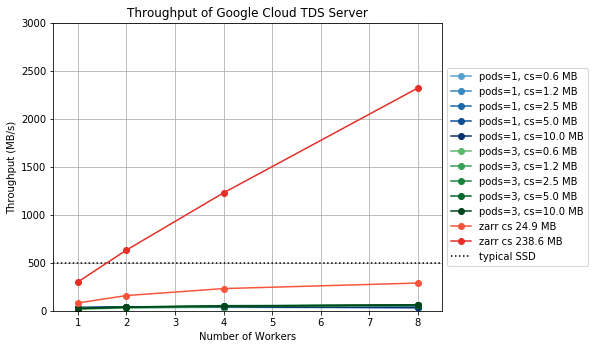

In [12]:
ax.set_prop_cycle(cycler.cycler('color', reds[5:]))
for name, group in df_zarr[df_zarr.nworkers<=8].groupby('chunksize_mb'):
    group.plot(x='nworkers', y='throughput',
               marker='o',
               label=f'zarr cs {name:3.1f} MB', ax=ax,
               legend=False)

#ax.set_ylim([10, 10000])
#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel('Number of Workers')
ax.set_ylim([0, 3000])
ax.grid()
ax.hlines(500, 0, 10, linestyles=':', label='typical SSD')
ax.set_xlim([0.5, 8.5])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
display(fig)
ax.set_title('Throughput of Zarr vs. TDS Server')
fig.savefig('zarr_vs_thredds_throughput.pdf')